In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'C:\\Users\kmmoh\Downloads\Githubupload\phising.csv')

In [3]:
X= df.drop('Result', axis =1)
y=df['Result']

# Feature selection

# Recursive feature elimination
Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

References:
http://scikit-learn.org/stable/modules/feature_selection.html

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

Selected features: ['having_IP_Address', 'Shortining_Service', 'having_At_Symbol', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Favicon', 'port', 'HTTPS_token', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Redirect', 'DNSRecord', 'web_traffic', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']


Selected features: ['having_IP_Address', 'Shortining_Service', 'having_At_Symbol', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Favicon', 'port', 'HTTPS_token', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Redirect', 'DNSRecord', 'web_traffic', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']


# Feature ranking with recursive feature elimination and cross-validation
RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

Optimal number of features: 19
Selected features: ['having_IP_Address', 'Shortining_Service', 'having_At_Symbol', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Favicon', 'port', 'HTTPS_token', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Redirect', 'DNSRecord', 'web_traffic', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']


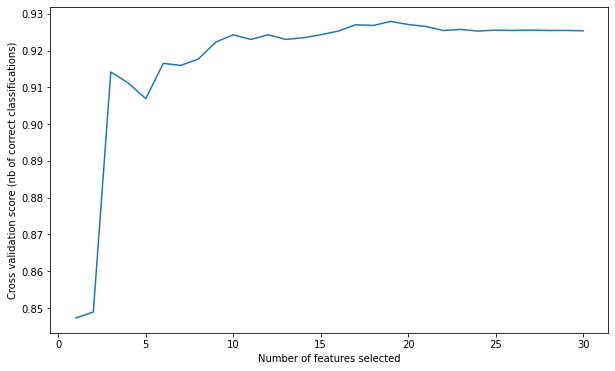

In [7]:
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [15]:
Selected_features = ['having_IP_Address', 'Shortining_Service', 'having_At_Symbol', 'Prefix_Suffix', 'having_Sub_Domain',
                     'SSLfinal_State', 'Favicon', 'port', 'HTTPS_token', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 
                     'Submitting_to_email', 'Redirect', 'DNSRecord', 'web_traffic', 'Google_Index', 'Links_pointing_to_page',
                     'Statistical_report']
X = df[Selected_features]


In [13]:
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 19 attributes
rfe = RFE(model, 19)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['having_IP_Address', 'Shortining_Service', 'having_At_Symbol', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Favicon', 'port', 'HTTPS_token', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Redirect', 'DNSRecord', 'web_traffic', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']


[0.01320873 0.00745406 0.00678621 0.05353344 0.06102703 0.35725609
 0.00813517 0.00380638 0.00808936 0.2653869  0.04372667 0.02595792
 0.00783138 0.00718692 0.01311073 0.07347262 0.01322737 0.02425068
 0.00655235]


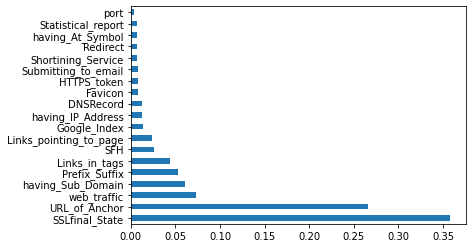

Index(['having_IP_Address', 'Shortining_Service', 'having_At_Symbol',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Favicon',
       'port', 'HTTPS_token', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Redirect', 'DNSRecord', 'web_traffic',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model=ExtraTreesClassifier()
model.fit(X,y)
ExtraTreesClassifier(random_state=101)
print(model.feature_importances_)
pd.Series(model.feature_importances_, index = X.columns).nlargest(20).plot(kind = 'barh')
plt.show()
X.columns

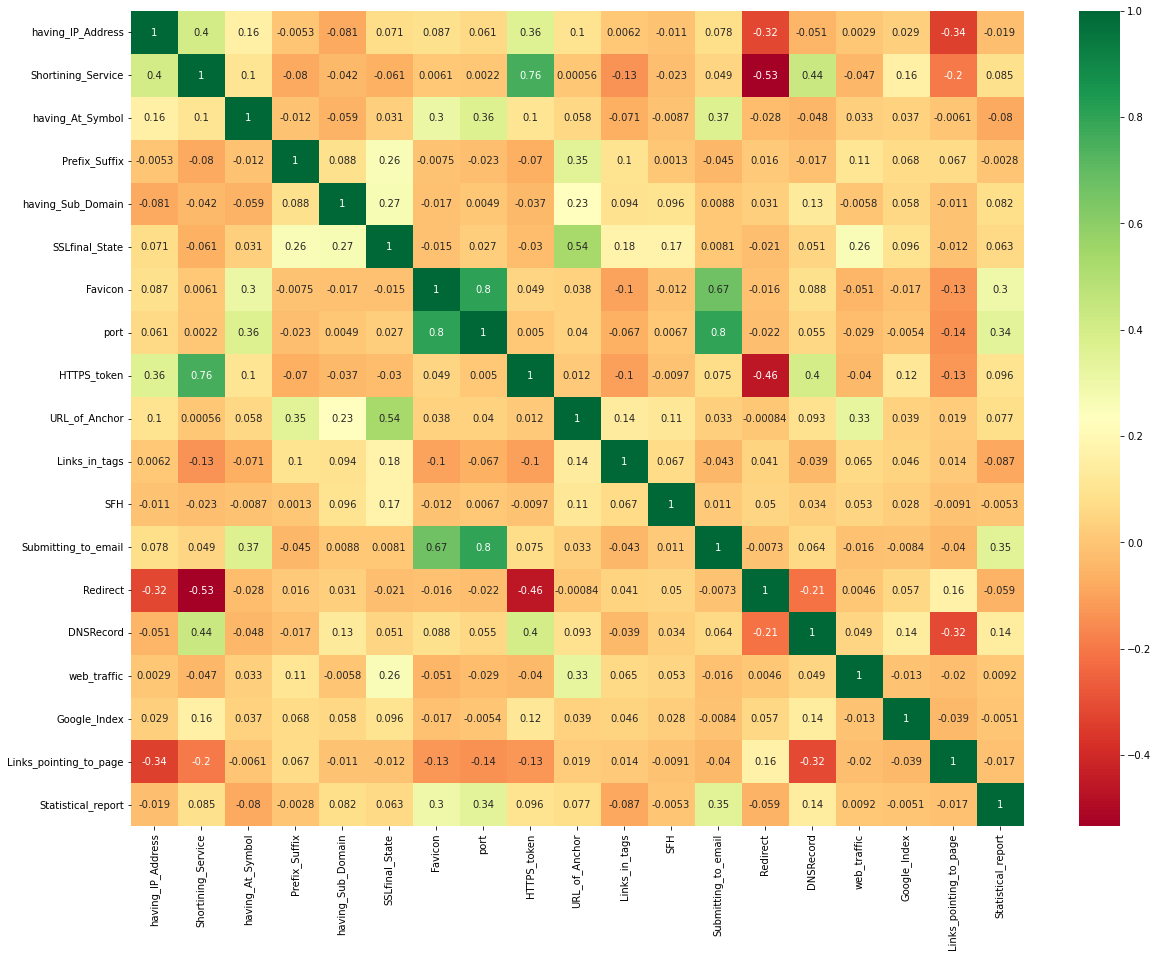

In [27]:
plt.subplots(figsize=(20, 15))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()